## 使用梯度上升法实现PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

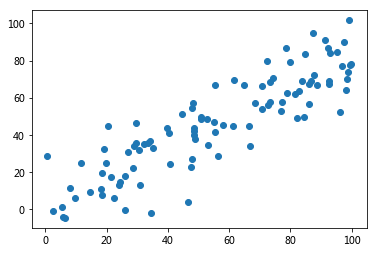

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

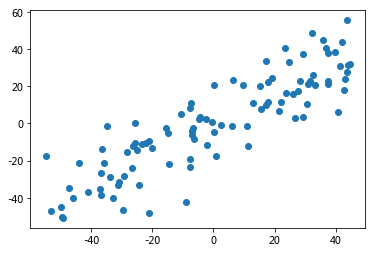

In [6]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [7]:
np.mean(X_demean[:,0])

5.044853423896711e-15

In [8]:
np.mean(X_demean[:,1])

-1.6271428648906295e-14

## 梯度上升法

目标函数：  
$\quad\Large Var(X_{project})=\frac{1}{m}\displaystyle\sum_{i=1}^m(X^{(i)}\cdot w)^2\quad$使得它最大

In [9]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

由上推导：  
${\large\nabla f}\quad=\quad{\huge\frac{2}{m}}\quad
$$\begin{pmatrix}
\displaystyle\sum_{i=1}^{m}(X^{(i)}w)X_1^{(i)}\\
\displaystyle\sum_{i=1}^{m}(X^{(i)}w)X_2^{(i)}\\
\cdots\\
\displaystyle\sum_{i=1}^{m}(X^{(i)}w)X_n^{(i)}\\
\end{pmatrix}$$\quad=\quad {\large{\Large\frac{2}{m}}}\cdot X^T(Xw)
$

In [10]:
# 求目标函数的梯度
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [11]:
# 测试求梯度函数的正确性
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [12]:
# 化为只表示方向的单位向量
def direction(w):
    return w / np.linalg.norm(w)

In [13]:
def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [14]:
initial_w = np.random.random(X.shape[1]) # 不能从0向量开始
initial_w

array([0.88168531, 0.68866783])

In [15]:
eta = 0.001

In [16]:
# 不能使用StandardScaler标准化数据

In [17]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.74979693, 0.66166801])

In [18]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.74979693, 0.66166801])

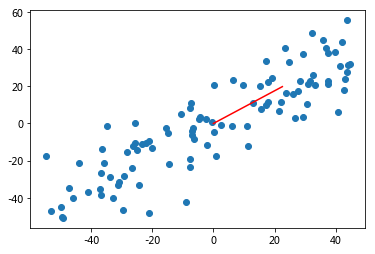

In [19]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

plt.scatter(X_demean[:,0], X_demean[:,1]) # 绘制源氏数据
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

说明将样本映射到直线对应的轴上，样本之间的方差是最大的，轴即为主成分

## 使用极端数据集测试

In [20]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

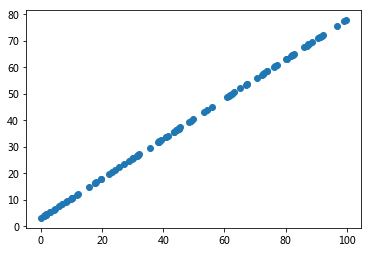

In [21]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [22]:
X2_demean = demean(X2)

In [23]:
gradient_ascent(df_math, X2_demean, initial_w, eta)

array([0.79999972, 0.60000037])

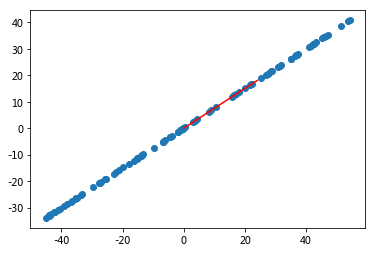

In [24]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()